# Correlations Between Atmospheric CO2 and Land Use Leveraged by Machine Learning

# Jake Kastenbauer

Here the combined atmospheric CO2 data and modeled land cover class data are analyzed in the co2_project.csv file. The code here pairs the percent of pixels in each image for each land cover class againt CO2 data points.

# 1. Dataset Loading and Variable Preperation

First, appropraite modules and the dataset are loaded. Then each variable is transformed into an array for linear regression analysis.

In [1]:
# Load modules
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as mp
import pandas as pd
import statsmodels.api as sm

In [8]:
# Import dataset
df = pd.read_csv("co2_project.csv")
df

,Image,CO2,AnnualCrop,SeaLake,Industrial,Highway,HerbaceousVegetation,Residential,PermenantCrop,Pasture,River,Forest
0,1,416.10205,1.782227,1.538086,1.489258,1.367188,1.684570,1.342773,1.391602,1.586914,1.391602,86.425781
1,2,417.57870,1.831055,2.075195,2.368164,1.562500,2.148438,1.953125,1.757812,2.319336,2.319336,81.665039
2,3,418.26935,2.636719,2.294922,2.026367,2.416992,2.148438,2.270508,2.734375,1.928711,2.270508,79.272461
3,4,417.67178,2.514648,2.514648,2.148438,2.636719,2.490234,2.099609,2.490234,2.465820,1.953125,78.686523
4,5,419.20340,2.514648,2.612305,2.856445,2.905273,2.709961,2.856445,2.612305,2.807617,2.978516,75.146484


In [9]:
# Convert variables to array for analysis
CO2 = np.array(df["CO2"])
Annual = np.array(df["AnnualCrop"]).reshape((-1, 1))
Lake = np.array(df["SeaLake"]).reshape((-1, 1))
Industry = np.array(df["Industrial"]).reshape((-1, 1))
Highway = np.array(df["Highway"]).reshape((-1, 1))
Veg = np.array(df["HerbaceousVegetation"]).reshape((-1, 1))
Residential = np.array(df["Residential"]).reshape((-1, 1))
Perennial = np.array(df["PermenantCrop"]).reshape((-1, 1))
Pasture = np.array(df["Pasture"]).reshape((-1, 1))
River = np.array(df["River"]).reshape((-1, 1))
Forest = np.array(df["Forest"]).reshape((-1, 1))

# 2. Linear Regressions

Each land cover variable is paired against CO2 content in a linear regression

In [10]:
# Multiple linear regression
# Set CO2 response variable equal to each land cover class
model = LinearRegression().fit(Annual, CO2)
r_sq = model.score(Annual, CO2)
print("Annual R Squared:", r_sq)

model = LinearRegression().fit(Lake, CO2)
r_sq = model.score(Lake, CO2)
print("Lake R Squared:", r_sq)

model = LinearRegression().fit(Industry, CO2)
r_sq = model.score(Industry, CO2)
print("Industry R Squared:", r_sq)

model = LinearRegression().fit(Highway, CO2)
r_sq = model.score(Highway, CO2)
print("Highway R Squared:", r_sq)

model = LinearRegression().fit(Veg, CO2)
r_sq = model.score(Veg, CO2)
print("Vegetation R Squared:", r_sq)

model = LinearRegression().fit(Residential, CO2)
r_sq = model.score(Residential, CO2)
print("Residential R Squared:", r_sq)

model = LinearRegression().fit(Perennial, CO2)
r_sq = model.score(Perennial, CO2)
print("Perennial R Squared:", r_sq)

model = LinearRegression().fit(Pasture, CO2)
r_sq = model.score(Pasture, CO2)
print("Pasture R Squared:", r_sq)

model = LinearRegression().fit(River, CO2)
r_sq = model.score(River, CO2)
print("River R Squared:", r_sq)

model = LinearRegression().fit(Forest, CO2)
r_sq = model.score(Forest, CO2)
print("Forest R Squared:", r_sq)

Annual R Squared: 0.5640944600684281
Lake R Squared: 0.8024048976075082
Industry R Squared: 0.7930527513225692
Highway R Squared: 0.7114743590792623
Vegetation R Squared: 0.7663010747165839
Residential R Squared: 0.9863491293967388
Perennial R Squared: 0.7180155955847501
Pasture R Squared: 0.6319748981235166
River R Squared: 0.9103629497055006
Forest R Squared: 0.9297116864538252


The most prominent land cover class regression, Forest - CO2, is shown graphically

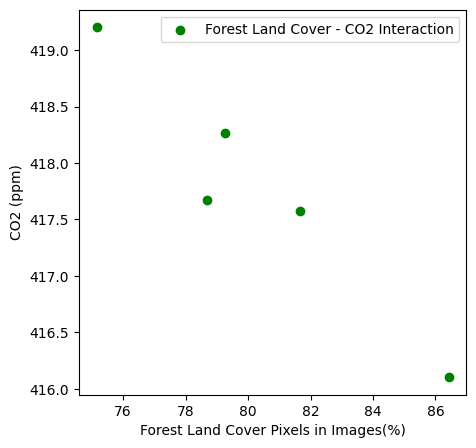

In [11]:
# Scatter plot of most significant land cover class
mp.figure(figsize=(5, 5))
mp.scatter(Forest, CO2, label='Forest Land Cover - CO2 Interaction', color = 'green')
mp.xlabel('Forest Land Cover Pixels in Images(%)')
mp.ylabel('CO2 (ppm)')
mp.legend()
mp.show()

# 3. Statistical Analysis

Finally, the linear model of forest pixel coverage and CO2 content is statistically analyzed

In [12]:
# Statistical analysis of most significant land cover class
model = sm.OLS(Forest, CO2).fit()
predictions = model.predict(Forest)
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              1677.
Date:                Thu, 21 Dec 2023   Prob (F-statistic):                    2.13e-06
Time:                        00:00:44   Log-Likelihood:                         -13.923
No. Observations:                   5   AIC:                                      29.85
Df Residuals:                       4   BIC:                                      29.46
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Code shown here exemplifies how atmospheric CO2 content can be paired with image classification data to determine significant relationships between dominant vegetation types, or lack thereof, and greenhouse gas emission. While previous datasets have collected CO2 data for areas of several square kilometers, here we see a strong correlation between estimated forest land cover and CO2 concentrations across only a few hundred square meters. Ideally, this information could be used in future analyses of how smaller scale land use changes can have potentially large impacts on atmospheric carbon dynamics.